In [1]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:盤中零股交易

盤中零股交易四大攻略 小資族練就投資真功夫
https://udn.com/news/story/7251/4985285
教育不必等 零歲養成財富 凱基證提主被動二大投資策略
https://news.cnyes.com/news/id/4537838
永豐金證券推雙11優惠 豐存股及零股手續費最低1元
https://money.udn.com/money/story/5607/4983170
孩子認識股票的第一課：從這三檔「看得見」的開始！
https://tw.stock.yahoo.com/news/%E5%AD%A9%E5%AD%90%E8%AA%8D%E8%AD%98%E8%82%A1%E7%A5%A8%E7%9A%84%E7%AC%AC%E4%B8%80%E8%AA%B2%E5%BE%9E%E9%80%99%E4%B8%89%E6%AA%94%E7%9C%8B%E5%BE%97%E8%A6%8B%E7%9A%84%E9%96%8B%E5%A7%8B-085819108.html
台積電ADR2日上漲1.84美元漲幅2.19%折台股495.56元
https://tw.stock.yahoo.com/news/%E5%8F%B0%E7%A9%8D%E9%9B%BBadr2%E6%97%A5%E4%B8%8A%E6%BC%B21-84%E7%BE%8E%E5%85%83%E6%BC%B2%E5%B9%852-19-%E6%8A%98%E5%8F%B0%E8%82%A1495-56%E5%85%83-232530192.html
買盤回籠 台股漲144點重返季線
https://www.cna.com.tw/news/afe/202011030172.aspx
蘋果11/11辦特別活動 傳發表Mac筆電
https://tw.stock.yahoo.com/news/%E8%98%8B%E6%9E%9C11-11%E8%BE%A6%E7%89%B9%E5%88%A5%E6%B4%BB%E5%8B%95-%E5%82%B3%E7%99%BC%E8%A1%A8mac%E7%AD%86%E9%9B%BB-235330927.html
《深滬股》上証指數上漲25.8681點、深成指數上漲90.3908點

,標題,連結
0,盤中零股交易四大攻略 小資族練就投資真功夫,https://udn.com/news/story/7251/4985285
1,教育不必等 零歲養成財富 凱基證提主被動二大投資策略,https://news.cnyes.com/news/id/4537838
2,永豐金證券推雙11優惠 豐存股及零股手續費最低1元,https://money.udn.com/money/story/5607/4983170
3,孩子認識股票的第一課：從這三檔「看得見」的開始！,https://tw.stock.yahoo.com/news/%E5%AD%A9%E5%A...
4,台積電ADR2日上漲1.84美元漲幅2.19%折台股495.56元,https://tw.stock.yahoo.com/news/%E5%8F%B0%E7%A...
5,買盤回籠 台股漲144點重返季線,https://www.cna.com.tw/news/afe/202011030172.aspx
6,蘋果11/11辦特別活動 傳發表Mac筆電,https://tw.stock.yahoo.com/news/%E8%98%8B%E6%9...
7,《深滬股》上証指數上漲25.8681點、深成指數上漲90.3908點,https://tw.stock.yahoo.com/news/%E6%B7%B1%E6%B...
8,《大陸股市》農業股領漲 滬指攻高逾1%,https://tw.stock.yahoo.com/news/%E5%A4%A7%E9%9...
9,【台北股市】漲144.7點,https://tw.stock.yahoo.com/news/%E5%8F%B0%E5%8...


In [2]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
# articleContent

article = []
for p in articleContent:
    article.append(p.text)


articleAll = '\n'.join(article)
# print(articleAll)

# 分段用

https://udn.com/news/story/7251/4985285


In [3]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/2p/qz_90rqs1fx0_vgnt2xgf6yw0000gn/T/jieba.cache
Loading model cost 1.345 seconds.
Prefix dict has been built succesfully.


搜索引擎模式: 盤中/ 零股/ 交昜/ 10/ 月/ 26/ 日/ 上路/ 以來/ 市場/ 熱度/ 不/ 減/ 永豐/ 豐金/ 永豐金/ 證券/ 投資/ 顧問/ 部為/ 廣大/ 小資/ 小資族/ 提出/ 零股/ 交易/ 四大/ 攻略/ 包括/ 以/ 當下/ 價格/ 委託/ 避開/ 急漲/ 急跌/ 時段/ 分散/ 分筆/ 拉回/ 買進/ 選擇/ 獲利/ 與/ 殖利/ 利率/ 殖利率/ 高殖利率股/ 布局/ 小額/ 投資/ 投資人/ 從/ 零股/ 入手/ 可以/ 練出/ 投資/ 真/ 功夫/ 創造/ 長期/ 理財/ 計畫/ 
/ 
/ 
/ 
/ 根據/ 證券/ 交易/ 交易所/ 統計/ 盤中/ 零股/ 交易/ 上路/ 首日/ 成交/ 達/ 491/ 萬股/ 成交/ 總額/ 4.2/ 億/ 元/ 盤後/ 也/ 有/ 1.9/ 億/ 元/ 的/ 水準/ 全日/ 合計/ 6.1/ 億/ 元/ 首日/ 上線/ 就/ 有/ 五倍/ 的/ 成長/ 成績/ ；/ 永豐/ 豐金/ 永豐金/ 證券/ 投資/ 顧問/ 部/ 表示/ 觀察/ 近/ 幾日/ 的/ 交易/ 市況/ 整股/ 與/ 零股/ 之間/ 存有/ 價格/ 差距/ 問題/ 普遍/ 來/ 說/ 零股/ 價格/ 較/ 高/ 例如/ 10/ 月/ 26/ 日/ 台積/ 台積電/ 曾經/ 出現/ 2.5/ -/ 3.0/ 元/ 的/ 價差/ 以/ 價格/ 跳動/ 最/ 小/ 單位/ 0.5/ 換算/ 就是/ 6/ 個/ ticks/ 所以/ 小資/ 小資族/ 開心/ 下單/ 之餘/ 還是/ 要/ 細心/ 注意/ 價格/ 偏離/ 變化/ 盤中/ 零股/ 交易/ 攻略/ 一/ 在/ 流動/ 流動性/ 充足/ 的/ 情況/ 下以/ 當下/ 價格/ 委託/ 想要/ 立即/ 成交/ 建議/ 追加/ 1/ -/ 2/ 個/ ticks/ 就/ 好/ 
/ 
/ 
/ 
/ 此外/ 9/ 點/ 10/ 分/ 才/ 有/ 第/ 一/ 筆/ 零股/ 撮合/ 成交/ 比/ 整股/ 交易/ 晚了/ 10/ 分鐘/ 永豐/ 豐金/ 永豐金/ 證券/ 投顧/ 部/ 表示/ 如果/ 這/ 段/ 時間/ 整股/ 價格/ 急漲/ 急跌/ 投資/ 投資人/ 不必/ 過於/ 驚慌/ 因為/ 每隔/ 3/ 分鐘/ 集合/ 競價/ 一/ 次/ ；/ 等待/ 行情/ 穩定/

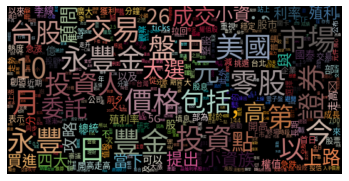

<Figure size 8000x4000 with 0 Axes>

In [10]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
# dicition = Counter(terms)
# print(Counter(terms))








        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(20,10),dpi= 400)
plt.show()

# plt.savefig("asdfghjkl.png")
wc.to_file("img/demo05.png")


In [9]:

newsDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
newsDf.sort_values(by= ['詞頻'], ascending= False)

,詞頻
,456
\n,45
投資,13
零股,12
交易,9
...,...
操作,1
成本,1
分攤,1
能,1
